Exercise 5

In [22]:
from langgraph.graph import StateGraph, END
import random
from typing import TypedDict, List

In [23]:
class GameState(TypedDict):
    player_name: str
    target_number: int
    guesses: List[int]
    attempts: int
    hints: int
    lower_bound: int
    upper_bound: int

In [24]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game state with random target number."""
    state['player_name'] = f"Welcome Player, {state['player_name']}!"
    state['target_number'] = random.randint(1, 25)
    state['guesses'] = []
    state['attempts'] = 0
    state['hints'] = "Game started! Try to guess the number."
    state['lower_bound'] = 1
    state['upper_bound'] = 25
    print(f"{state['player_name']} The game has started! Guess a number between {state['lower_bound']} and {state['upper_bound']}.")
    return state

In [25]:
def guess_node(state: GameState, guess: int) -> GameState:
    """Generate a smarter guess based on previous hints."""
    
    possible_guesses = [i for i in range(state['lower_bound'], state['upper_bound'] + 1) if i not in state['guesses']]
    if not possible_guesses:
        guess: random.choice(possible_guesses)
    else:
        guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    state['attempts'] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']} to {state['upper_bound']})")
    return state

In [26]:
def hint_node(state: GameState) -> GameState:
    """Here we provide hints based on the last guess and update the bounds."""
    latest_guess = state['guesses'][-1]
    target = state['target_number']
    
    if latest_guess < target:
        state['hints'] = f"Your guess {latest_guess} is too low! Try a higher number."
        state['lower_bound'] = max(state['lower_bound'], latest_guess + 1)
        print(f"Hint: {state['hints']}")
    elif latest_guess > target:
        state['hints'] = f"Your guess {latest_guess} is too high! Try a lower number."
        state['upper_bound'] = min(state['upper_bound'], latest_guess - 1)
        print(f"Hint: {state['hints']}")
    else:
        state['hints'] = f"Congratulations! You've guessed the number {target} in {state['attempts']} attempts!"
        print(f"Success! {state['hints']}")
        
    return state

In [27]:
def should_continue(state: GameState) -> str:
    """Determini if we should continue the game."""
    
    latest_guess = state['guesses'][-1]
    if latest_guess == state['target_number']:
        print("Game Over: You've guessed the number correctly!")
        return "end"
    elif state['attempts'] >= 10:
        print("Game Over: You've used all attempts! Better luck next time. The number was:", state['target_number'])
        return "end"
    else:
        print(f"Continue playing: {state['attempts']} attempts made, {state['hints']}")
        return "continue"

In [28]:
stateGraph = StateGraph(GameState)
stateGraph.add_node("setup", setup_node)
stateGraph.add_node("guess", guess_node)
stateGraph.add_node("hint", hint_node)

stateGraph.add_edge("setup", "guess")
stateGraph.add_edge("guess", "hint")

stateGraph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)
stateGraph.set_entry_point("setup")
app = stateGraph.compile()

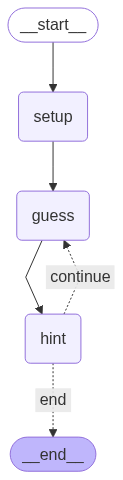

In [29]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))  # Display the graph in Jupyter Notebook

In [31]:
restul = app.invoke({"player_name": "Player1", "target_number": 0, "guesses": [], "attempts": 0, "hints": "", "lower_bound": 1, "upper_bound": 25})
print("Game started! You can now interact with the game by making guesses.")
    

Welcome Player, Player1! The game has started! Guess a number between 1 and 25.


TypeError: guess_node() missing 1 required positional argument: 'guess'